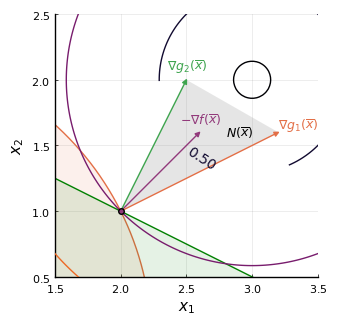

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [24]:
#Ex. 1 - Lecture 7

using Plots, LaTeXStrings
pyplot(size=(325,325))

n=500
x1 = range(0, stop=sqrt(5)-10e-6, length=n)
x2 = sqrt.((x1.^2).*(-1) .+ 5)

plot(x1, x2, legend=false, fill=(0,0.1), color = :2)
x1 = range(0, 4, length=n)

plot!(x1, (4 .- x1)./2, color = :green, fill=(0,0.1))
f(x) = (x[1] - 3)^2 + (x[2] - 2)^2 
x1 = range(-1, stop=10, length=n);
x2 = range(-1, stop=10, length=n);

z = [f([x1[i],x2[j]]) for j = 1:n, i = 1:n];

x_ref = [2, 1]
λ = 0.3

df(x) = λ*[2(x[1]-3), 2(x[2] - 2)]
dg1(x) = λ*[2x[1], 2x[2]]

df1 = -df(x_ref)
dg11 = dg1(x_ref)
dg2 = 0.5.*[1, 2]

# Cone between gradient vectors
plot!(Shape(x_ref[1] .+ [0.0, dg11[1], dg2[1]], x_ref[2] .+ [0.0, dg11[2], dg2[2]]), alpha = 0.2, color = :gray, linealpha = 0)

contour!(x1, x2, z, 
        levels = [0.02, 0.5, 2.0, 4.0],
        xaxis = (L"$x_1$", (1.5,3.5)),
        yaxis = (L"$x_2$", (0.5,2.5)),
        size = (325,325),        
        clims = (0,6),
        aspect_ratio = :equal,
        clabels = true
)


orange = RGBA(247/255,134/255,21/255,1.0)
light_purple = RGBA(146/255,58/255,123/255, 1.0)
grey = RGBA(229/255, 229/255, 229/255, 1.0)

quiver!([x_ref[1]],[x_ref[2]], gradient=([df1[1]],[df1[2]]), color = light_purple)
annotate!([(2.45, 1.7, text(L"$-\nabla f(\overline{x})$", 9, :left, light_purple))])

quiver!([x_ref[1]],[x_ref[2]], gradient=([dg11[1]],[dg11[2]]), color = :2)
annotate!(3.2, 1.65, text(L"$\nabla g_1(\overline{x})$", 9, :left, palette(:default)[2]))

quiver!([x_ref[1]],[x_ref[2]], gradient=([dg2[1]],[dg2[2]]), color = :3)
annotate!(2.35, 2.1, text(L"$\nabla g_2(\overline{x})$", 9, :left, palette(:default)[3]))

annotate!(2.8, 1.6, text(L"$N(\overline{x})$", 9, :left))

scatter!((2, 1), color = light_purple)


savefig("ex2_KKT.pdf")

In [13]:
palette(:default)